In [24]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
bom_movie_gross = pd.read_csv('bom.movie_gross.csv.gz')# imdb_name_basics = pd.read_csv('imdb.name.basics 2.csv')
imdb_title_basics = pd.read_csv('imdb.title.basics.csv')

In [69]:
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [10]:
imdb_title_basics['genres'].dropna(inplace=True)

In [11]:
imdb_title_basics.genres = imdb_title_basics.genres.map(lambda x : x.split(','))

In [12]:
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"[Comedy, Drama, Fantasy]"


In [13]:
imdb_title_basics.explode('genres').head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama


In [70]:
movie_gross_title_basics_genres = pd.merge(left=bom_movie_gross, right=imdb_title_basics, how='inner', left_on='title', right_on='primary_title')

In [22]:
movie_gross_title_basics.groupby('genres')['domestic_gross'].median()

genres
Action         14650000.0
Adventure      47050000.0
Animation      47250000.0
Biography       2200000.0
Comedy          4000000.0
Crime           2500000.0
Documentary      613000.0
Drama           1100000.0
Family         19600000.0
Fantasy        15650000.0
History         1250000.0
Horror          8500000.0
Music           2350000.0
Musical          855000.0
Mystery         2700000.0
News             102000.0
Romance         1200000.0
Sci-Fi         47600000.0
Sport           6200000.0
Thriller        3300000.0
War              316000.0
Western         1450000.0
Name: domestic_gross, dtype: float64

<BarContainer object of 22 artists>

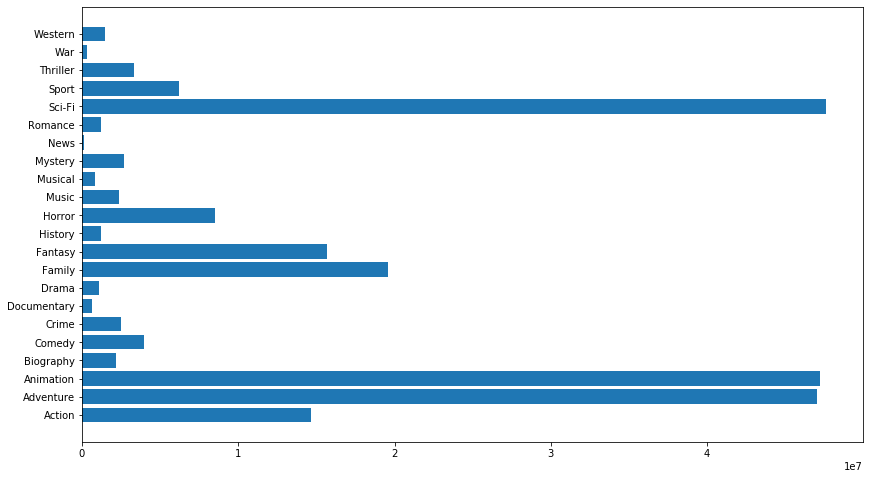

In [30]:
fig, ax = plt.subplots(figsize=(14,8))

x = movie_gross_title_basics.groupby('genres')['domestic_gross'].median().index
y = movie_gross_title_basics.groupby('genres')['domestic_gross'].median()

# ax.set_title('Number of Films by Number of Genre Categories')
# ax.set_xlabel('Number of Genre Categories')
# ax.set_ylabel('Number of films')

ax.barh(x, y)

In [79]:
movie_gross_title_basics_genres[movie_gross_title_basics_genres['genres'].str.contains('Animation')]

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy"
5,Tangled,BV,200800000.0,391000000,2010,tt0398286,Tangled,Tangled,2010,100.0,"Adventure,Animation,Comedy"
6,Despicable Me,Uni.,251500000.0,291600000,2010,tt1323594,Despicable Me,Despicable Me,2010,95.0,"Animation,Comedy,Family"
7,How to Train Your Dragon,P/DW,217600000.0,277300000,2010,tt0892769,How to Train Your Dragon,How to Train Your Dragon,2010,98.0,"Action,Adventure,Animation"
...,...,...,...,...,...,...,...,...,...,...,...
3137,Tag,WB (NL),54700000.0,23400000,2018,tt5908018,Tag,Tag,2016,76.0,Animation
3163,Early Man,LGF,8300000.0,46400000,2018,tt4701724,Early Man,Early Man,2018,89.0,"Adventure,Animation,Comedy"
3167,The Son of Bigfoot,VPD,289000.0,46800000,2018,tt5715410,The Son of Bigfoot,The Son of Bigfoot,2017,92.0,"Adventure,Animation,Comedy"
3182,Monster Family,VPD,127000.0,26300000,2018,tt6572702,Monster Family,Happy Family,2017,93.0,"Animation,Comedy,Family"


In [81]:
movie_gross_title_basics_genres[movie_gross_title_basics_genres['genres'].str.contains('Animation')].groupby('genres').domestic_gross.median()

genres
Action,Adventure,Animation    103400000.0
Action,Animation,Comedy       107500000.0
Action,Animation,Drama           175000.0
Adventure,Animation,Comedy    104150000.0
Adventure,Animation,Drama       1001500.0
Adventure,Animation,Family     19200000.0
Animation                      40150000.0
Animation,Biography,Crime       6700000.0
Animation,Biography,Drama       5200000.0
Animation,Comedy,Crime         10100000.0
Animation,Comedy,Drama          3800000.0
Animation,Comedy,Family       148300000.0
Animation,Comedy,Fantasy          23400.0
Animation,Crime,Drama            351000.0
Animation,Documentary          63850000.0
Animation,Drama                  555000.0
Animation,Drama,Family          1000000.0
Animation,Drama,Fantasy         4350000.0
Animation,Drama,Sci-Fi           138000.0
Animation,Fantasy                350000.0
Name: domestic_gross, dtype: float64

<BarContainer object of 20 artists>

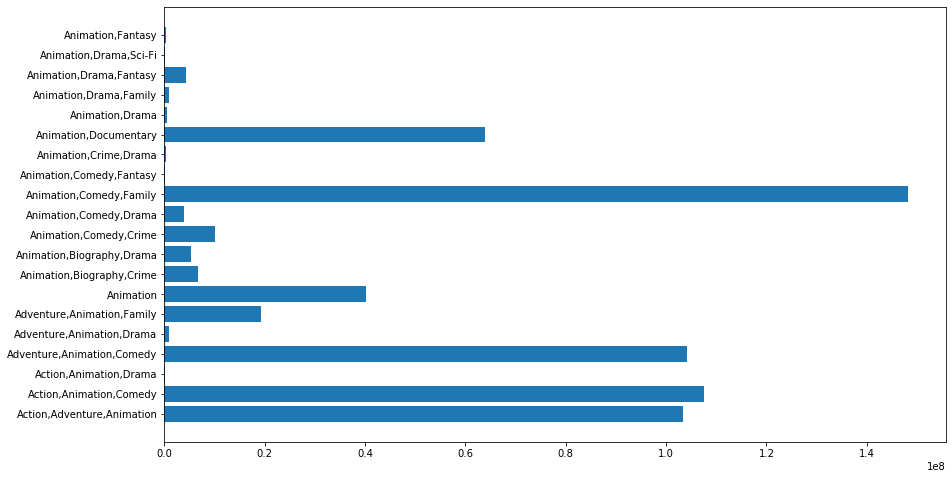

In [82]:
fig, ax = plt.subplots(figsize=(14,8))

x = movie_gross_title_basics_genres[movie_gross_title_basics_genres['genres'].str.contains('Animation')].groupby('genres').domestic_gross.median().index
y = movie_gross_title_basics_genres[movie_gross_title_basics_genres['genres'].str.contains('Animation')].groupby('genres').domestic_gross.median()

# ax.set_title('Number of Films by Number of Genre Categories')
# ax.set_xlabel('Number of Genre Categories')
# ax.set_ylabel('Number of films')

ax.barh(x, y)

<BarContainer object of 49 artists>

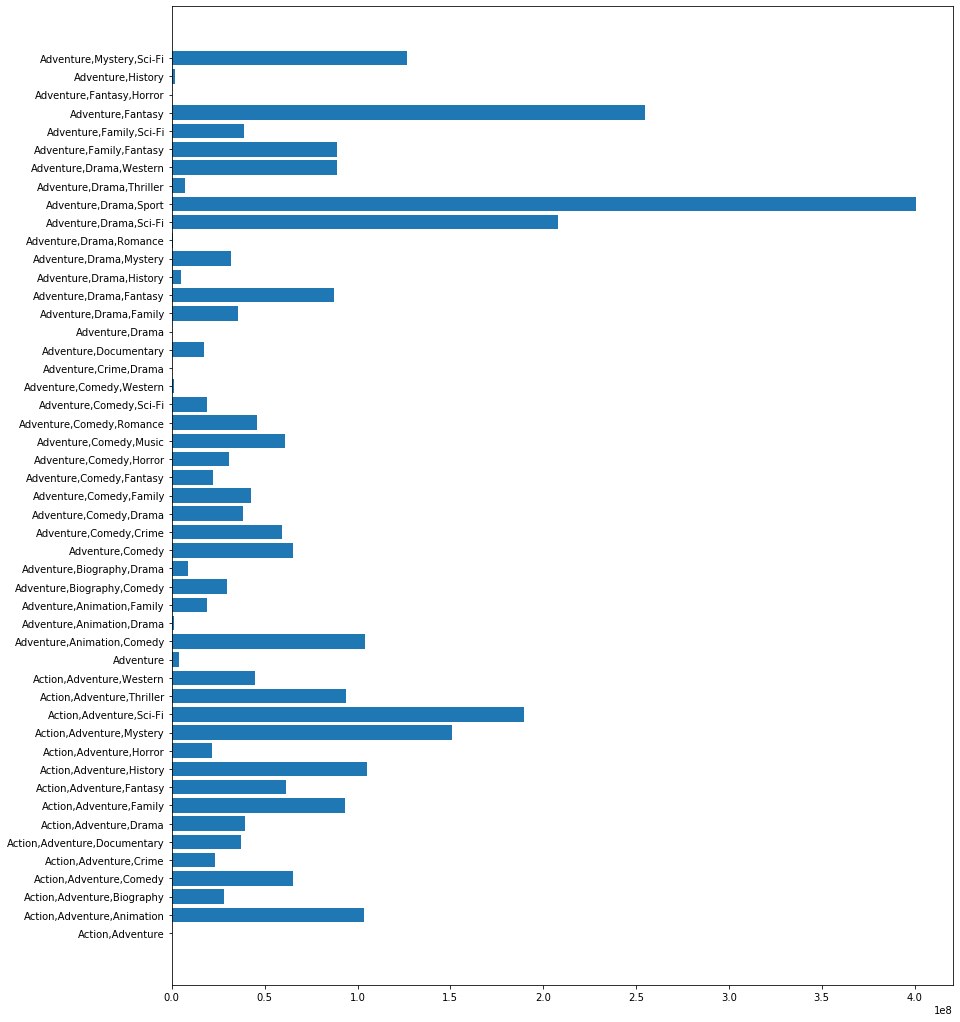

In [84]:
fig, ax = plt.subplots(figsize=(14,18))

x = movie_gross_title_basics_genres[movie_gross_title_basics_genres['genres'].str.contains('Adventure')].groupby('genres').domestic_gross.median().index
y = movie_gross_title_basics_genres[movie_gross_title_basics_genres['genres'].str.contains('Adventure')].groupby('genres').domestic_gross.median()

# ax.set_title('Number of Films by Number of Genre Categories')
# ax.set_xlabel('Number of Genre Categories')
# ax.set_ylabel('Number of films')

ax.barh(x, y)

<BarContainer object of 25 artists>

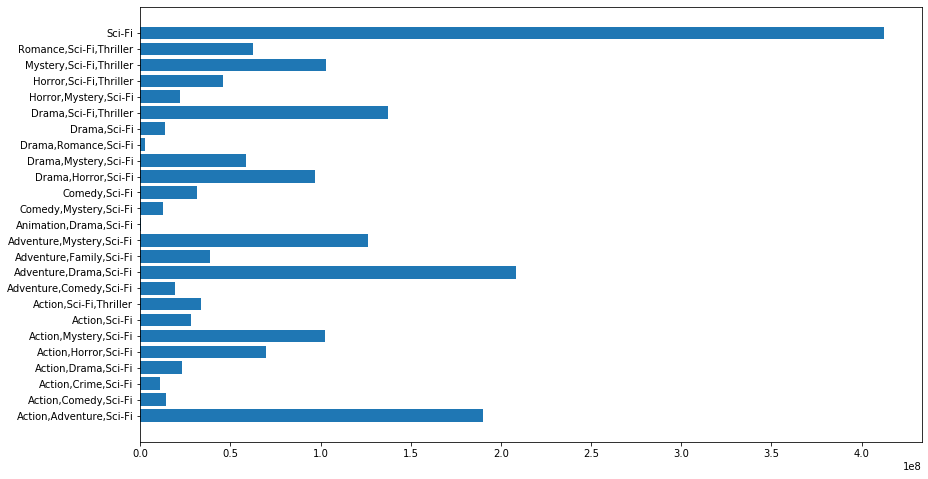

In [85]:
fig, ax = plt.subplots(figsize=(14,8))

x = movie_gross_title_basics_genres[movie_gross_title_basics_genres['genres'].str.contains('Sci-Fi')].groupby('genres').domestic_gross.median().index
y = movie_gross_title_basics_genres[movie_gross_title_basics_genres['genres'].str.contains('Sci-Fi')].groupby('genres').domestic_gross.median()

# ax.set_title('Number of Films by Number of Genre Categories')
# ax.set_xlabel('Number of Genre Categories')
# ax.set_ylabel('Number of films')

ax.barh(x, y)